# Loading data

In [1]:
!pip install pandas
!pip install matplotlib
!pip install seaborn
!pip install sklearn

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
# using a style for the plots
sns.set(rc={'axes.facecolor':"#EBE0BA",
            "figure.facecolor":"#E0D3AF",
            "grid.color":"#E0D3AF",
            "axes.edgecolor":"#424949",
            "axes.labelcolor":"#424949",
            "text.color":"#424949" # color for headlines and sub headlines
           }) 
#opening the files
train = pd.read_csv("data/train.csv").set_index("PassengerId")
test = pd.read_csv("data/test.csv").set_index("PassengerId")

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [4]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


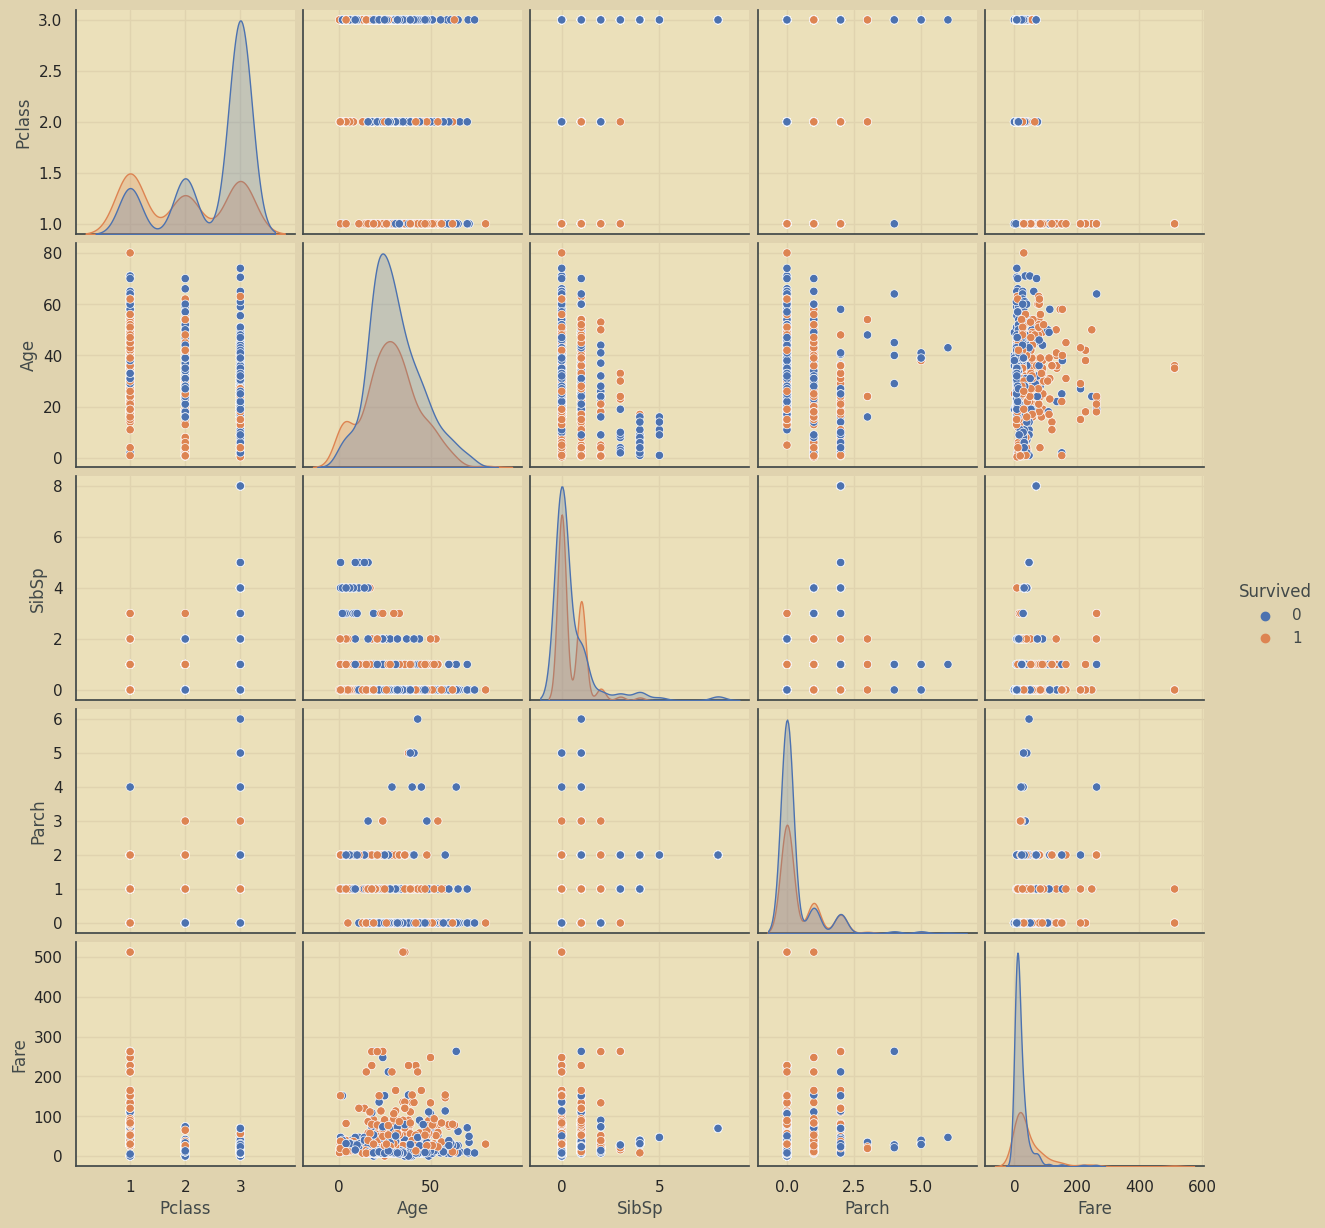

In [5]:
sns.pairplot(train, hue="Survived")

# Tratamiento de datos

In [6]:
train.isnull().mean()

Survived    0.000000
Pclass      0.000000
Name        0.000000
Sex         0.000000
Age         0.198653
SibSp       0.000000
Parch       0.000000
Ticket      0.000000
Fare        0.000000
Cabin       0.771044
Embarked    0.002245
dtype: float64

In [7]:
test.isnull().mean()
# we only have to treat sex since is the only missing value that is going to be used in this model, fare is not relevan

Pclass      0.000000
Name        0.000000
Sex         0.000000
Age         0.205742
SibSp       0.000000
Parch       0.000000
Ticket      0.000000
Fare        0.002392
Cabin       0.782297
Embarked    0.000000
dtype: float64

## Treatment for null ages

In [8]:
print(train[(train["Pclass"]==1) & (train["Sex"]=="female")]["Age"].median())
print(train[(train["Pclass"]==1) & (train["Sex"]=="male")]["Age"].median())
print(train[(train["Pclass"]==2) & (train["Sex"]=="female")]["Age"].median())
print(train[(train["Pclass"]==2) & (train["Sex"]=="male")]["Age"].median())
print(train[(train["Pclass"]==3) & (train["Sex"]=="female")]["Age"].median())
print(train[(train["Pclass"]==3) & (train["Sex"]=="male")]["Age"].median())

35.0
40.0
28.0
30.0
21.5
25.0


In [9]:
from itertools import product
l1, l2 = [1,2,3], ["female","male"]
for c,s in product(l1,l2):
    #for train
    msk_train = (train["Pclass"]==c) & (train["Sex"]==s)
    train.loc[msk_train,"Age"] = train[msk_train]["Age"].fillna(train[msk_train]["Age"].median())
    #for test
    msk_test = (test["Pclass"]==c) & (test["Sex"]==s)
    test.loc[msk_test,"Age"] = test[msk_test]["Age"].fillna(test[msk_test]["Age"].median())


## Treatment for null embarked

since there are only two null values in embarked col, we replace it with a fixed value

In [10]:
train.loc[train["Embarked"].isna(),"Embarked"] = "S"

# Finding some relevant information

In [12]:
scr_df = train.copy()
ts_df = test.copy()

Changing categorical data to numerical for manipulation

In [21]:
sex_dict = {'male': 0, 'female': 1}
embarked_dict = {'S': 1, 'C': 2, 'Q': 3}
# for train
def sx_embarked_to_cat(df):
    df = df[df['Embarked'].notnull()].copy()
    df.loc[:, 'Sex'] = df.loc[:,'Sex'].map(lambda x: sex_dict[x])
    df.loc[:, 'Embarked'] = df.loc[:, 'Embarked'].map(lambda x: embarked_dict[x])
    return dfe
# for test 
scr_df = sx_embarked_to_cat(scr_df)
ts_df = sx_embarked_to_cat(ts_df)


Getting  the correlation of the variables to find valueable information

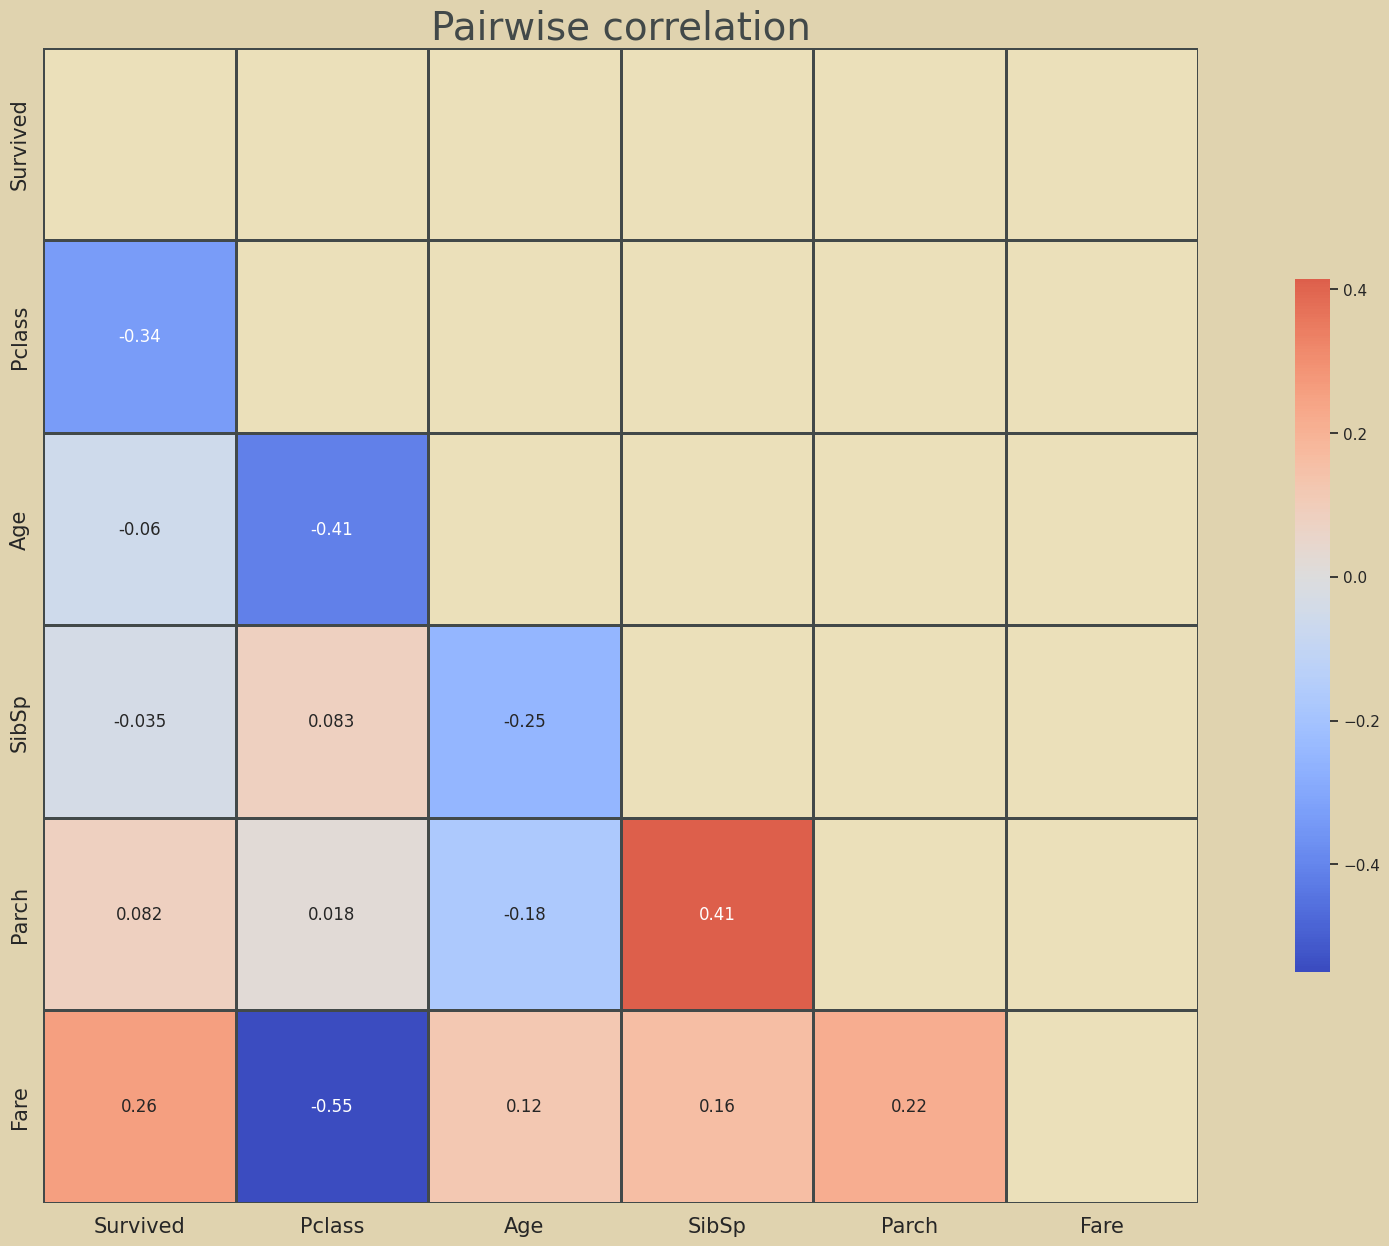

In [14]:
corr = scr_df.corr()
f, ax = plt.subplots(figsize=(25, 15))
# change x- and y-label size
ax.tick_params(axis='both', which='major', labelsize=15)
mask = np.triu(np.ones_like(corr, dtype=bool))

sns.heatmap(corr, mask=mask, cmap="coolwarm", center=0, square=True, linewidths=1, linecolor="#424949", annot=True, 
                cbar_kws={"shrink": 0.6}).set_title('Pairwise correlation', fontsize="28");

Getting relation between sex and class survival probability

In [22]:
sex_class_prob_dict = {}
#  1 = female, 0 = male
for n in [0, 1]:
    for m in [1,2,3]:
        df = scr_df[(scr_df['Pclass'] == m) & (scr_df['Sex'] == n)].copy()
        gender = "hombre" if n == 0 else "mujer"
        sex_class_prob_dict[gender + f", clase: {str(m)}"] = round(len(df[df['Survived'] == 1]) / len(df['Survived']),2)

Text(0.5, 0.98, 'Probabilidad de supervivencia')

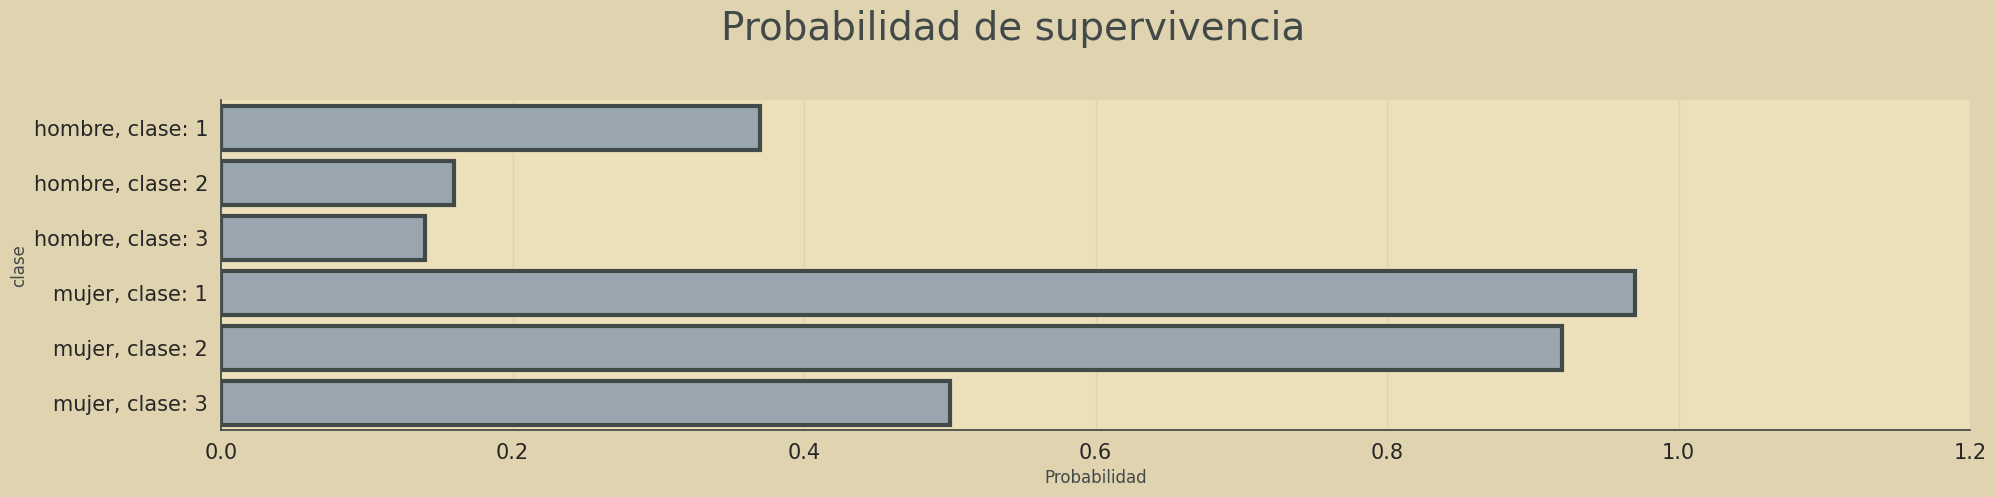

In [23]:
df = pd.DataFrame.from_dict(sex_class_prob_dict, orient='index').rename(columns={0: "Probabilidad"})
df['clase'] = df.index
fg = sns.catplot(data=df, kind="bar", y="clase", x="Probabilidad", height=5, color="#97A7B2",  aspect=3.9, linewidth = 3, ec="#424949")
fg.set_xticklabels(fontsize=15)
fg.set_yticklabels(fontsize=15)
fg.fig.subplots_adjust(top=0.8)
fg.fig.suptitle("Probabilidad de supervivencia", fontsize="28")

# Choosing variables

> Since we saw a high relationship between gender, class an survival we decided to included in our model, but no more numerical data has a strong relation between survival other than fare, so we decide to search more on the categorical data.

> We choose to search more on the ticket to see if we could get more information on that, since the cabin variable has a 77% porcent of null values and could be biased to threat it

In [ ]:
scr_df['Ticket'].value_counts().nlargest(5)

In [ ]:
scr_df[scr_df['Ticket'] == 'CA. 2343']

> As we said before, the fare was the numerical data with strong relation between survival, but, since the tickets of a whole family has the same fare, we believe that this data could be very biased

In [ ]:
tmp_df = scr_df['Ticket'].str.split(' ', 1, expand=True).copy()

tmp_df[1][tmp_df[1].isnull()] = tmp_df[0]
tmp_df[0][tmp_df[1] == tmp_df[0]] = 'no_prefix' 

scr_df[['Ticket_prefix', 'Ticket_number']]= tmp_df

In [ ]:
scr_df['Ticket_prefix'].value_counts(100)

# Training

LogisticRegression

In [55]:
from sklearn.linear_model import LogisticRegression
features = ['Sex','Pclass','SibSp','Embarked']
x_train=scr_df[features]
y_train=train['Survived']
lg=LogisticRegression()
lg.fit(x_train,y_train)

LogisticRegression()

RandomForest

In [56]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train, y_train)

RandomForestClassifier()

In [57]:
# Testing

from sklearn.metrics import accuracy_score
x = ts_df[features]
y = ts_df["Survived"]

lg_predicted = lg.predict(x)
rf_predicted = rf.predict(x)

lg_scr = accuracy_score(lg_predicted,y)
rf_scr = accuracy_score(rf_predicted,y)
print("Logistic Regresion:", lg_scr, "Random Forest:", rf_scr)

Logistic Regresion: 0.8035914702581369 Random Forest: 0.8170594837261503


In [61]:
# Saving models and usefull info
import pickle
pickle.dump(lg,"w")

TypeError: file must have a 'write' attribute